In [1]:
%matplotlib inline

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
from torchvision.io import read_image


plt.rcParams["savefig.bbox"] = 'tight'
torch.manual_seed(1)


def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [7]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0C2A-EB53

 Directory of C:\Users\gupta\Downloads\Hands_On_PyTorch_ML

11-03-2024  12.02 AM    <DIR>          .
11-03-2024  12.02 AM    <DIR>          ..
10-03-2024  11.51 PM    <DIR>          .ipynb_checkpoints
02-03-2024  04.52 PM            31,889 01_04 Data Exploration - Tutors.ipynb
10-03-2024  05.06 AM            91,332 01_04 Dataset Exploration - Fashion MNIST.ipynb
10-03-2024  05.11 AM             3,210 02_01 Understand PyTorch Tensors.ipynb
10-03-2024  05.21 AM            24,966 02_02 Understand PyTorch Basic Operations.ipynb
10-03-2024  06.55 PM             9,943 02_03 Understand PyTorch Numpy Bridge.ipynb
10-03-2024  08.36 PM             6,820 02_04 Autograd.ipynb
10-03-2024  11.47 PM            16,918 02_05 Advanced AutoGrad.ipynb
10-03-2024  11.55 PM             5,924 03_02 TorchVision.ipynb
02-03-2024  04.52 PM         8,551,200 04_02 TorchAudio Speech Recognition.ipynb
02-03-2024  04.52 PM           107,626 05_02 Tor

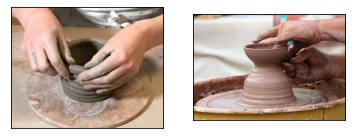

In [8]:
pottery1 = read_image(str(Path('images') / 'pottery1.jpeg'))
pottery2 = read_image(str(Path('images') / 'pottery2.jpeg'))
show([pottery1, pottery2])

In [9]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

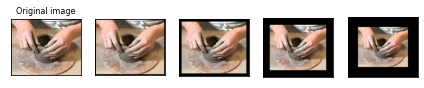

In [10]:
# Most transforms natively support tensors on top of PIL images 
# image padding

from PIL import Image
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(Path('images') / 'pottery1.jpeg')

padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

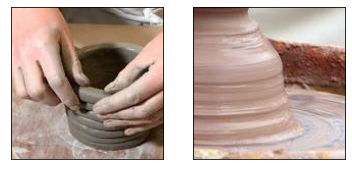

In [15]:
# try some random crop

import torch.nn as nn

transforms = torch.nn.Sequential(
    T.RandomCrop(150),
    T.RandomHorizontalFlip(p=0.3),
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
pottery1 = pottery1.to(device)
pottery2 = pottery2.to(device)

transformed_pottery1 = transforms(pottery1)
transformed_pottery2 = transforms(pottery2)
show([transformed_pottery1, transformed_pottery2])

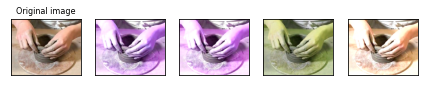

In [16]:
# color jitter
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

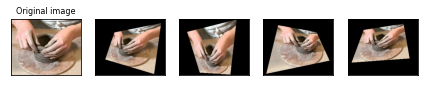

In [17]:
# random perspectives
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

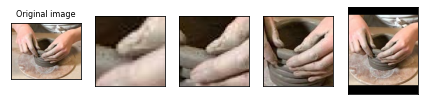

In [18]:
# various center crop 
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(center_crops)